In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from data_loader import load_track_data, load_race_data


In [5]:
track_left_side, track_right_side = load_track_data(distance_pr_dot = 10)

track_left_side.head()

c:\GitHub\RacingTrajectories\data_loader.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  track_left_side = pd.read_csv(f'Data/Map_details/nurburgring_GP_track_leftside_raw.csv', index_col=False)
c:\GitHub\RacingTrajectories\data_loader.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  track_right_side = pd.read_csv(f'Data/Map_details/nurburgring_GP_track_rightside_raw.csv', index_col=False)


NameError: name 'np' is not defined

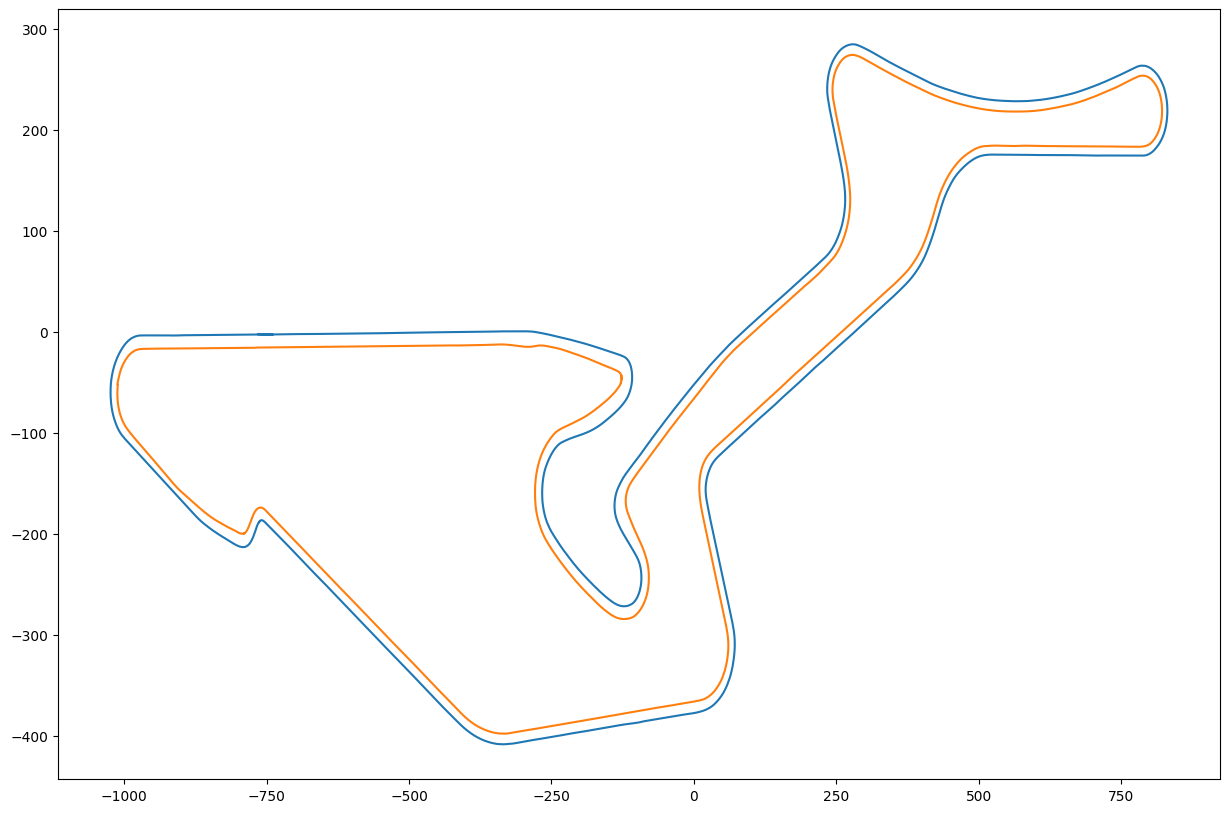

In [37]:
# Plot the reduced track in 2D using matplotlib
fig, ax = plt.subplots()
ax.plot(df_left_reduced['Z-Coords'],df_left_reduced['X-Coords'])
ax.plot(df_right_reduced['Z-Coords'],df_right_reduced['X-Coords'] )
# Change size of the plot
fig.set_size_inches(15, 10)
plt.show()

In [ ]:

def create_track_network(df_left_side, df_right_side, points_distance, grid_distance, diagonally_connected):
    combined_df = pd.concat([df_left_reduced, df_right_reduced], ignore_index=True)
    
    # Creating a grid of nodes based on the combined data and specified grid_distance
    min_x, max_x = combined_df['X-Coords'].min(), combined_df['X-Coords'].max()
    min_y, max_y = combined_df['Y-Coords'].min(), combined_df['Y-Coords'].max()
    x_coords = np.arange(min_x, max_x, grid_distance)
    y_coords = np.arange(min_y, max_y, grid_distance)
    
    G = nx.Graph()  # Creating an undirected graph

    # Adding nodes to the graph based on the grid
    for x in x_coords:
        for y in y_coords:
            G.add_node((x, y))

    # Connecting nodes with edges based on the specified grid_distance
    for x in x_coords:
        for y in y_coords:
            for dx, dy in [(grid_distance, 0), (0, grid_distance)]:
                if (x + dx, y) in G:
                    G.add_edge((x, y), (x + dx, y))
                if (y + dy, x) in G:
                    G.add_edge((x, y), (x, y + dy))
                
                # Add diagonal connections if specified
                if diagonally_connected:
                    for dx, dy in [(grid_distance, grid_distance), (-grid_distance, grid_distance)]:
                        if (x + dx, y + dy) in G:
                            G.add_edge((x, y), (x + dx, y + dy))
    
    return G
